In [85]:
import pandas as pd
import numpy as np

In [86]:
anime=pd.read_csv("C:\\Users\\DELL\\Downloads\\DATASCIENCE ASSIGNMENTS\\anime.csv")
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [87]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


# Data Preprocessing:

In [89]:
anime.isnull().sum().sum()

317

In [90]:
anime_df=anime.dropna()

In [91]:
for column in anime.select_dtypes(include=['object']).columns:
    print(f'{column}: {anime[column].nunique()} unique values')


name: 12292 unique values
genre: 3264 unique values
type: 6 unique values
episodes: 187 unique values


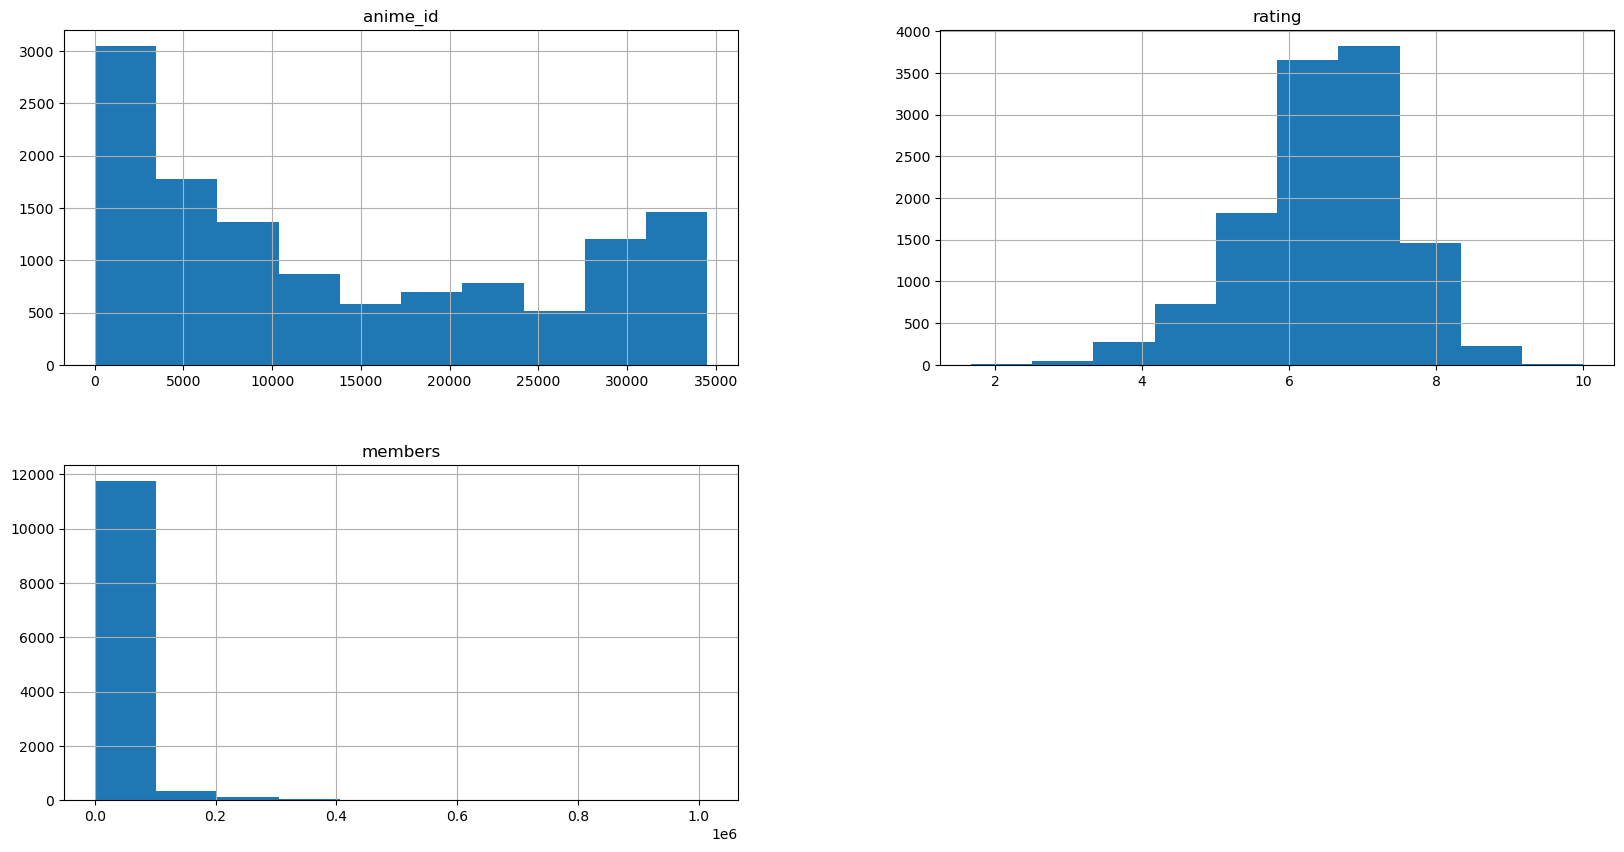

In [92]:
import matplotlib.pyplot as plt
anime.hist(figsize=(20,10))
plt.show()


# Recommendation System:

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
# Convert genres to a binary matrix
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
genre_matrix = count_vectorizer.fit_transform(anime_df['genre'])


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [95]:
from sklearn.metrics.pairwise import cosine_similarity
#  the cosine similarity matrix
cosine_sim = cosine_similarity(genre_matrix)
cosine_sim.shape


(12017, 12017)

In [96]:
def recommend_anime(anime_name, cosine_sim=cosine_sim, anime_df=anime_df, num_recommendations=5):
    anime_idx = anime_df[anime_df['name'] == anime_name].index[0]
    sim_scores = list(enumerate(cosine_sim[anime_idx]))
   # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   #  the top similar anime
    sim_scores = sim_scores[1:num_recommendations + 1] 
    anime_indices = [i[0] for i in sim_scores]
    return anime_df['name'].iloc[anime_indices]


In [97]:
recommended_anime = recommend_anime('Naruto', num_recommendations=15)
recommended_anime

615                                    Naruto: Shippuuden
841                                                Naruto
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
1343                                          Naruto x UT
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
1573    Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2458                 Naruto Shippuuden: Sunny Side Battle
2997    Naruto Soyokazeden Movie: Naruto to Mashin to ...
175                                Katekyo Hitman Reborn!
7628                              Kyutai Panic Adventure!
7837                        Battle Spirits: Ryuuko no Ken
206                                         Dragon Ball Z
515                                Dragon Ball Kai (2014)
588                                       Dragon Ball Kai
1209                                  Medaka Box Abnormal
Name: name, dtype: object

# Evaluation:

In [99]:
from sklearn.model_selection import train_test_split

# Simulate user preferences by splitting the dataset into a training  set and a test  set
train_df, test_df = train_test_split(anime_df, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


In [100]:
def recommend_anime_for_test_set(anime_name, cosine_sim=cosine_sim, anime_df=anime_df, train_df=train_df, num_recommendations=5):
    train_indices = train_df.index
    anime_idx = anime_df[anime_df['name'] == anime_name].index[0]
    sim_scores = list(enumerate(cosine_sim[anime_idx]))
    sim_scores = [sim for sim in sim_scores if sim[0] in train_indices]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[:num_recommendations]
    anime_indices = [i[0] for i in sim_scores]
    return anime_df['name'].iloc[anime_indices]
recommendations = recommend_anime_for_test_set(test_df['name'][0])
print(recommendations)


6214    Mashiro-iro Symphony: Airi ga Anata no Kanojo ...
1376                   Date A Live Movie: Mayuri Judgment
1980                                            Nyan Koi!
2447                          H2O: Footprints in the Sand
3242                            Daitoshokan no Hitsujikai
Name: name, dtype: object


In [101]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
ground_truth = pd.DataFrame({
    'anime_id': [1, 2, 3, 4, 5],
    'true_labels': [[1, 2], [1, 3, 4], [2, 5], [3, 4], [1, 5]]})
recommendations = pd.DataFrame({
    'anime_id': [1, 2, 3, 4, 5],
    'recommended': [[2, 3], [4, 5], [1, 5], [2, 3], [1, 2]]})
mlb = MultiLabelBinarizer()
y_true = mlb.fit_transform(ground_truth['true_labels'])
y_pred = mlb.transform(recommendations['recommended'])
y_true_flat = y_true.ravel()
y_pred_flat = y_pred.ravel()

# classification report
report = classification_report(y_true_flat, y_pred_flat)
print(report)


              precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.50      0.45      0.48        11

    accuracy                           0.56        25
   macro avg       0.55      0.55      0.55        25
weighted avg       0.56      0.56      0.56        25



In [103]:
#Precision: High precision means that when the system predicts a genre, its usually correct. A low precision indicates that many of the predicted genres are incorrect.
#Recall: High recall means that the system correctly identifies a high proportion of actual genres. A low recall indicates that the system misses many relevant genres.
#F1-Score: The F1-score is a balance between precision and recall. A higher F1-score indicates better overall performance.

# Interview Questions:

# 1.Can you explain the difference between user-based and item-based collaborative filtering?

In simple words item based collaborative filtering is based on the notion of item similarity. While user based collaborative filtering is based on the notion of user similarity.

# 2. What is collaborative filtering, and how does it work?

Collaborative filtering is a family of algorithms where there are multiple ways to find similar users or items and multiple ways to calculate rating based on ratings of similar users. Depending on the choices you make, you end up with a type of collaborative filtering approach.